In [1]:
from polypy import Read as rd
from polypy import Density as Dens

In [2]:
Atom = "F"
timestep = 0.25

In [3]:
# 1) Read Coordinates

data = rd.read_history("../../../OLD/PolyPy/development/HISTORY_F", "F")

In [4]:
# Create Density object
density = Dens.Density(data)

In [5]:
# 3) Total Number of Species within a given region
plane = density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of ", Atom, " Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

Total Number of  F  Between -5.0 - 5.0 : 540986  across  1457 timesteps


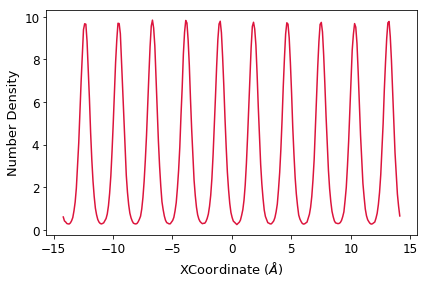

In [6]:
# 4) One Dimensional Density Plot

density.one_dimensional_density(Bin=0.1)

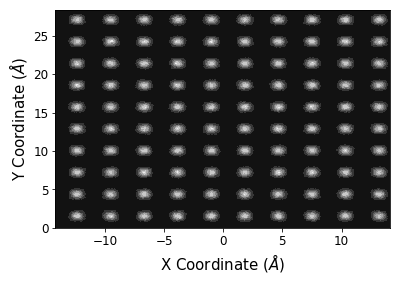

In [7]:
# 5) Two Dimensional Density Plot

density.two_dimensional_density(box=0.1)

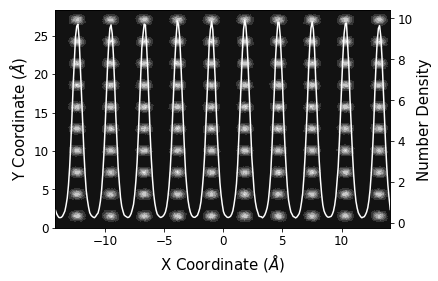

In [8]:
density.one_and_two_dimension_overlay(box=0.1)